![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Project: Analyzing Bitcoin crash

For this project, we will be reviewing the reasons for the most recent bitcoin crash.

We will be doing Visualizations, identifying trends and provide data-driven recommendations or information, so that every stakeholder, and myself of course, can take action.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

Let's start by describing how the analysis will be taken. We will be using Python libraries (pandas, numpy and matplotlib) for the process. 



In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
#let's import the dataset from the web and clean it
btc = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1624646714&period2=1656182714&interval=1d&events=history&includeAdjustedClose=true") 
btc['Date'] = pd.to_datetime(btc['Date']) # parse Date from object to datetime64
btc.set_index('Date', inplace = True) #set Date as index
btc['Mean'] = (btc['Open'] + btc['Close']) / 2
btc.dropna() #drop null values, used btc.isnull().sum()
btc.head()

,Open,High,Low,Close,Adj Close,Volume,Mean
Date,,,,,,,
2021-06-25,34659.105469,35487.246094,31350.884766,31637.779297,31637.779297,40230904226,33148.442383
2021-06-26,31594.664063,32637.587891,30184.501953,32186.277344,32186.277344,38585385521,31890.470703
2021-06-27,32287.523438,34656.128906,32071.757813,34649.644531,34649.644531,35511640894,33468.583985
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752,34556.728516
2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,37901460044,35171.667969


In [ ]:
dd

Now that we have a clean dataframe, let's begin analyzing it. First, let's quickly plot it so that we have a visual to base on.

Text(DatetimeIndex(['2022-06-18'], dtype='datetime64[ns]', name='Date', freq=None), 18108.623047, '$17708')

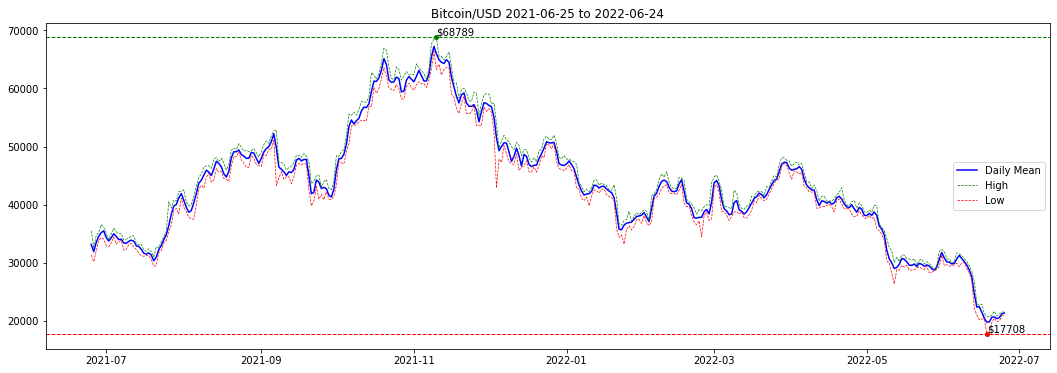

In [206]:
plt.figure(figsize=(18,6))
plt.title('Bitcoin/USD 2021-06-25 to 2022-06-24')
plt.plot(btc.index, btc['Mean'], color="blue", linewidth = 1.5)
plt.plot(btc.index, btc['High'], color = "green", linewidth=.7, linestyle='dashed')
plt.plot(btc.index, btc['Low'], color ="red", linewidth=.7, linestyle='dashed')
plt.legend(['Daily Mean', 'High', 'Low'])
plt.plot(btc[btc['High'].max() == btc['High']].index, btc['High'].max(), marker="o", color = "green", markersize=4)
plt.plot(btc[btc['Low'].min() == btc['Low']].index, btc['Low'].min(), marker="o", color = "red", markersize=4)
plt.axhline(y=btc['High'].max(), color='g', linestyle='dashed', linewidth=1, label="Maximo historico")
plt.axhline(y=btc['Low'].min(), color='r', linestyle='dashed', linewidth=1)

plt.annotate('${}'.format(int(btc['High'].max())), xy=(btc[btc['High'].max() == btc['High']].index, btc['High'].max() + 400))
plt.annotate('${}'.format(int(btc['Low'].min())) , xy=(btc[btc['Low'].min() == btc['Low']].index, btc['Low'].min() + 400))

